In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
df.drop(['id'],axis=1,inplace=True)

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
na_count = []

for i in range(0,len(df.columns)):
    na_count.append(df[df.columns[i]].isna().sum())

na_df = pd.DataFrame(zip(df.columns,na_count))
na_df.columns = ['parameter','na']
na_df

,parameter,na
0,gender,0
1,age,0
2,hypertension,0
3,heart_disease,0
4,ever_married,0
5,work_type,0
6,Residence_type,0
7,avg_glucose_level,0
8,bmi,201
9,smoking_status,0


In [7]:
for i in ['gender','hypertension','heart_disease','ever_married','work_type',\
          'Residence_type','smoking_status','stroke']:
    print("the unique values for {}:".format(i))
    print(round(df[i].value_counts(normalize= True),2),'\n')

the unique values for gender:
Female    0.59
Male      0.41
Other     0.00
Name: gender, dtype: float64 

the unique values for hypertension:
0    0.9
1    0.1
Name: hypertension, dtype: float64 

the unique values for heart_disease:
0    0.95
1    0.05
Name: heart_disease, dtype: float64 

the unique values for ever_married:
Yes    0.66
No     0.34
Name: ever_married, dtype: float64 

the unique values for work_type:
Private          0.57
Self-employed    0.16
children         0.13
Govt_job         0.13
Never_worked     0.00
Name: work_type, dtype: float64 

the unique values for Residence_type:
Urban    0.51
Rural    0.49
Name: Residence_type, dtype: float64 

the unique values for smoking_status:
never smoked       0.37
Unknown            0.30
formerly smoked    0.17
smokes             0.15
Name: smoking_status, dtype: float64 

the unique values for stroke:
0    0.95
1    0.05
Name: stroke, dtype: float64 



In [8]:
pd.crosstab(df.loc[df['bmi'].isna()].smoking_status,
            df.loc[df['bmi'].isna()].stroke,
            margins= True)

stroke,0,1,All
smoking_status,,,
Unknown,43,18,61
formerly smoked,35,13,48
never smoked,34,6,40
smokes,49,3,52
All,161,40,201


In [9]:
print(df.loc[df['gender']=='Male']['bmi'].describe(),'\n')
print(df.loc[df['gender']=='Female']['bmi'].describe(),'\n')

count    2011.000000
mean       28.647936
std         7.464493
min        11.500000
25%        24.000000
50%        28.400000
75%        32.500000
max        97.600000
Name: bmi, dtype: float64 

count    2897.000000
mean       29.065758
std         8.110783
min        10.300000
25%        23.400000
50%        27.800000
75%        33.500000
max        78.000000
Name: bmi, dtype: float64 



In [10]:
#To replace missing values in bmi, median bmi for male and female will be used as it only occupied 4% of the data 
#and will not affect the distribution of the data.

df.loc[df['gender']=='Male','bmi'] = df.loc[df['gender'] == 'Male']['bmi'].fillna(28.4)
df.loc[df['gender']=='Female', 'bmi'] = df.loc[df['gender'] == 'Female']['bmi'].fillna(27.8)

In [11]:
df.loc[df['gender']=='Female', 'bmi']

1       27.8
3       34.4
4       24.0
7       22.8
8       27.8
        ... 
5104    18.6
5105    27.8
5106    40.0
5107    30.6
5109    26.2
Name: bmi, Length: 2994, dtype: float64

In [12]:
df.gender

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: object

### The data is split into x and y for later processing.

In [13]:
df_x = df.iloc[:,0:-1]
df_y = df.iloc[:,-1]

In [14]:
df_x.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [15]:
categorical_cols=['gender','ever_married','work_type','Residence_type','smoking_status']
df_x_1hot = pd.get_dummies(df_x,columns= categorical_cols)
df_x_1hot

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,27.8,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,27.8,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


### Additional dummy variables are dropped as number of dummy variables should be n-1. If the categorical variable has 3 unique values, only 2 dummy variables are generated.

In [16]:
df_x_1hot.drop(['gender_Male','ever_married_No','work_type_Never_worked',
                            'Residence_type_Rural','smoking_status_never smoked'],axis= 1, inplace= True)

df_1hot = df_x_1hot.copy()
df_1hot['stroke'] = df_y




df_x_1hot


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,0,1,0,1,0,0,1,0,1,0
1,61.0,0,0,202.21,27.8,1,0,1,0,0,1,0,0,0,0,0
2,80.0,0,1,105.92,32.5,0,0,1,0,1,0,0,0,0,0,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,27.8,1,0,1,0,1,0,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,1,0,1,0,0,1,0,1,0,0,0
5107,35.0,0,0,82.99,30.6,1,0,1,0,0,1,0,0,0,0,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,1,0,0,0,0,1,0


In [17]:
df_x_1hot

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,0,1,0,1,0,0,1,0,1,0
1,61.0,0,0,202.21,27.8,1,0,1,0,0,1,0,0,0,0,0
2,80.0,0,1,105.92,32.5,0,0,1,0,1,0,0,0,0,0,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,27.8,1,0,1,0,1,0,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,1,0,1,0,0,1,0,1,0,0,0
5107,35.0,0,0,82.99,30.6,1,0,1,0,0,1,0,0,0,0,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,1,0,0,0,0,1,0


## Data Exploration

 This section will use various data visualisation techniques to understand the relationships among the variables in terms of distribution and correlation.

In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt


/Users/mehdi/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mehdi/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mehdi/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexin

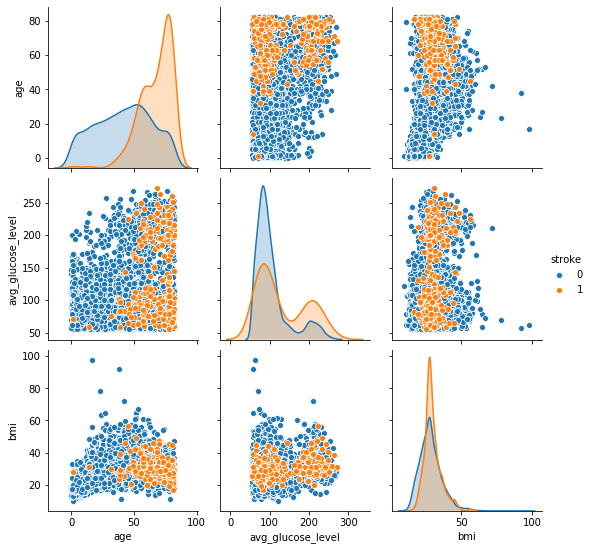

In [19]:

sns.pairplot(df_1hot.loc[:,["age",'avg_glucose_level','bmi','stroke']],
             hue="stroke")
plt.show()

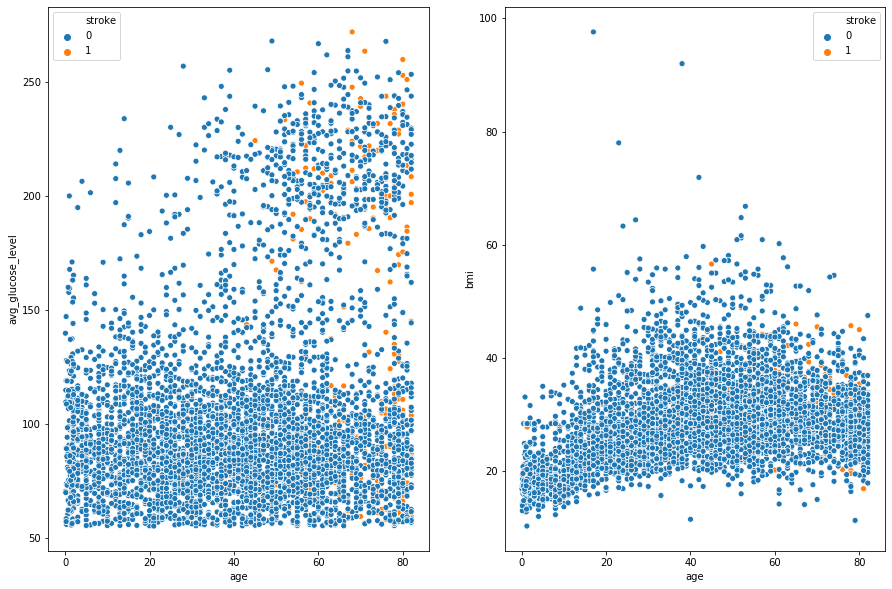

In [20]:
fig, ax = plt.subplots(1,2, figsize=(15,10))
sns.scatterplot(data = df_1hot ,
                x = 'age', y= 'avg_glucose_level', hue='stroke',ax= ax[0] )
sns.scatterplot(data= df_1hot,
               x= 'age', y= 'bmi', hue= 'stroke', ax= ax[1])


If looking at the scatterplot between age with avg_glucose_level and age with bmi, patients with stroke are tend to be older while their avg_glucose_level and bmi are similar with patients without stroke. Therefore, the best models to classify the classes are:

#### logistic regression:
can use a probablistic formula to create a non-linear boundary

#### decision tree:
create multiple orthogonal boundaries for classification through data parititioning

In [21]:
dict(df_y.value_counts(normalize=True))[0]

0.9512720156555773

## Feature Importance Ranking Using Deviance (Logistic Regression) & Random Forest Classifier


Feature ranking is required to determine the ordering of the features and best set of the features to be used in the model. There are 2 methods to be used:

&emsp; deviance ranking: generate deviance for each feature to determine the goodness of fit using probablistic model. The lower the deviance, the better the goodness-of-fit. However, the deviance ranking is only looking at a single independent variable at a time.

&emsp; importance ranking using random forest: random forest can generate multiple decision trees and the features can be ranked based on how many trees have used these features to classify the instances with the smallest impurity based on gini index or the smallest classification error.

In [22]:
def deviance(X, y, model):
    return 2*log_loss(y, model.predict_proba(X), normalize=False)
cls_weight = dict(df_y.value_counts(normalize= True))
cls_weight

{0: 0.9512720156555773, 1: 0.0487279843444227}

In [23]:
# A for loop is created to use each single independent variable for logistic regression modelling to determine 
# the residual deviance as a measure of goodness-of-fit.

from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression as LogReg
import numpy as np
deviance_list = []

for i in df_x_1hot.columns:
    deviance_clf = LogReg(random_state= 48, class_weight= cls_weight)
    deviance_clf.fit(np.array(df_x_1hot[i]).reshape(-1,1),df_y)
    deviance_temp=deviance(np.array(df_x_1hot[i]).reshape(-1,1),df_y,deviance_clf)
    deviance_list.append(deviance_temp)
    
deviance_df = pd.DataFrame(zip(df_x_1hot.columns,deviance_list))
deviance_df.columns = ["variables","residual_deviance"]
deviance_df.sort_values(by="residual_deviance", inplace= True)

In [24]:
deviance_df

,variables,residual_deviance
0,age,2591.908835
3,avg_glucose_level,2909.237263
7,ever_married_Yes,2922.054936
1,hypertension,2929.232648
2,heart_disease,2934.110139
11,work_type_children,2950.688709
14,smoking_status_formerly smoked,2968.580839
10,work_type_Self-employed,2970.088534
13,smoking_status_Unknown,2970.213639
4,bmi,2980.035245


In [25]:
# Random forest classifier with 500 trees and maximum depth of 4 is used to calculate the feature importance.
from sklearn.ensemble import RandomForestClassifier as rf_classifier

feature_ranking_rf = rf_classifier(n_estimators= 500, max_features= 'auto', max_depth= 4
                                   ,random_state= 48, class_weight= cls_weight)

feature_ranking_rf.fit(df_x_1hot, df_y)

ranking_df = pd.DataFrame(zip(df_x_1hot.columns, feature_ranking_rf.feature_importances_))
ranking_df.columns = ["variables","feature_impt_score"]
ranking_df.sort_values(by= 'feature_impt_score', inplace= True, ascending= False)

In [26]:
df_x_1hot


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,0,1,0,1,0,0,1,0,1,0
1,61.0,0,0,202.21,27.8,1,0,1,0,0,1,0,0,0,0,0
2,80.0,0,1,105.92,32.5,0,0,1,0,1,0,0,0,0,0,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,27.8,1,0,1,0,1,0,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,1,0,1,0,0,1,0,1,0,0,0
5107,35.0,0,0,82.99,30.6,1,0,1,0,0,1,0,0,0,0,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,1,0,0,0,0,1,0


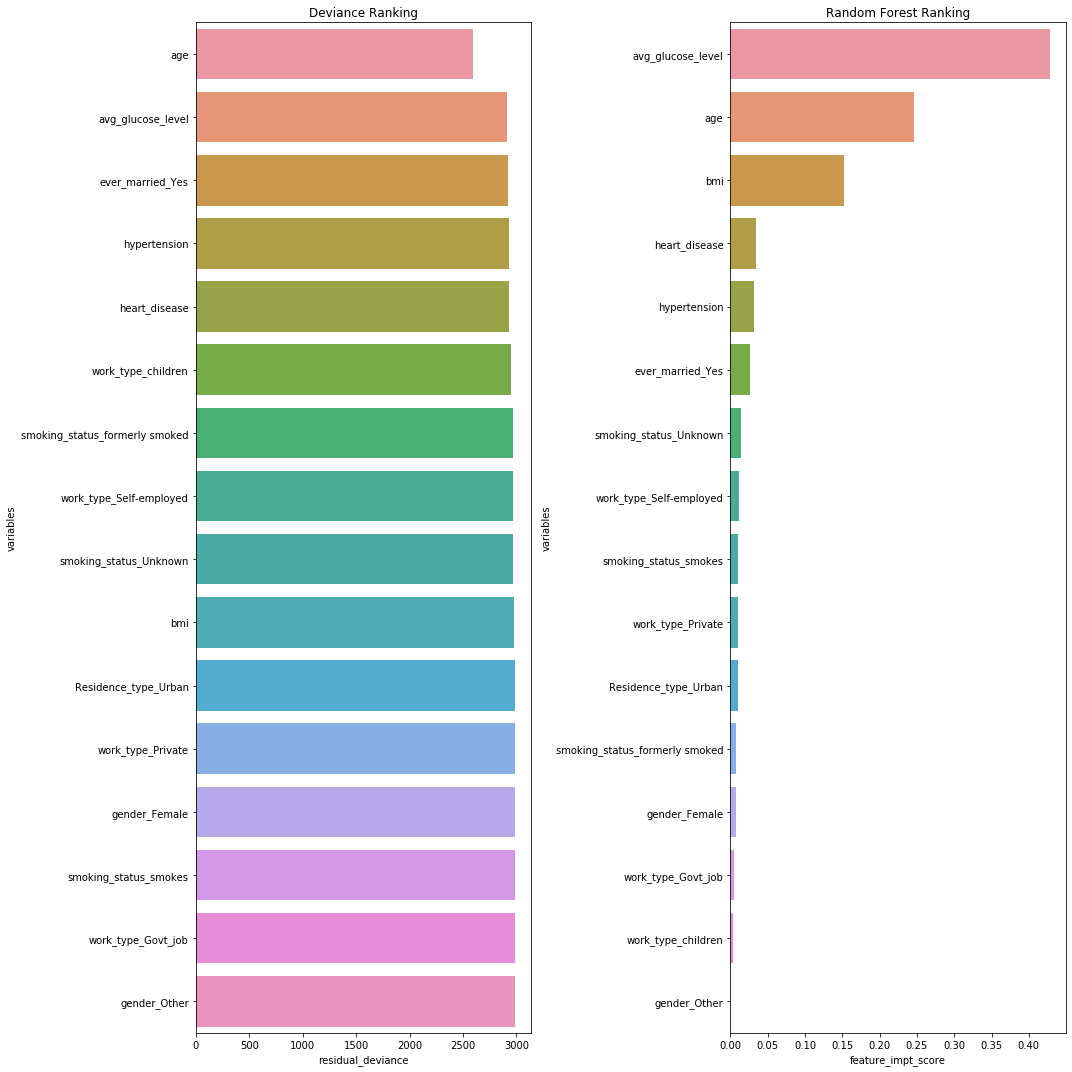

In [27]:
fig, ax= plt.subplots(1,2, figsize=(15,15))

sns.barplot(x='residual_deviance', y= 'variables', data= deviance_df, ax= ax[0] ).set_title("Deviance Ranking")

sns.barplot(x= 'feature_impt_score', y= 'variables' , data= ranking_df, ax= ax[1]).set_title("Random Forest Ranking")


fig.tight_layout()
plt.show()

Looking at the graph above, deviance ranking shows that age, avg_glucose_level, ever_married, hypertension and heart disease are the top 5 variables that can explain the likelihood of getting a stroke while feature importance ranking using random forest indicates that bmi is better in explaining the likelihood of getting a stroke compared to ever_married.

These two rankings will be used in logistic regression and decision tree to determine which rankings are more suitable for each model based on classification error and F1 score.

## Applying SMOTE 

Due to imablance class size, SMOTE (Synthetic Minority Oversampling Technique) algorithm is used to generate additional samples for minority class using k-nearest neighbour method. 

In [63]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state= 48)

smote_x, smote_y = smote.fit_resample(df_x_1hot, df_y)

print("The target value caounts before SMOTE: \n", df_y.value_counts() , "\n\n"
      , 'After SMOTE the total value counts:\n', smote_y.value_counts())



The target value caounts before SMOTE: 
 0    4861
1     249
Name: stroke, dtype: int64 

 After SMOTE the total value counts:
 1    4861
0    4861
Name: stroke, dtype: int64


In [51]:

stroke_smote = smote_x.copy()
stroke_smote['stroke'] = smote_y.copy()

stroke_smote.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.6,0,0,1,0,1,0,0,1,0,1,0,1
1,61.0,0,0,202.21,27.8,1,0,1,0,0,1,0,0,0,0,0,1
2,80.0,0,1,105.92,32.5,0,0,1,0,1,0,0,0,0,0,0,1
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,0,0,1


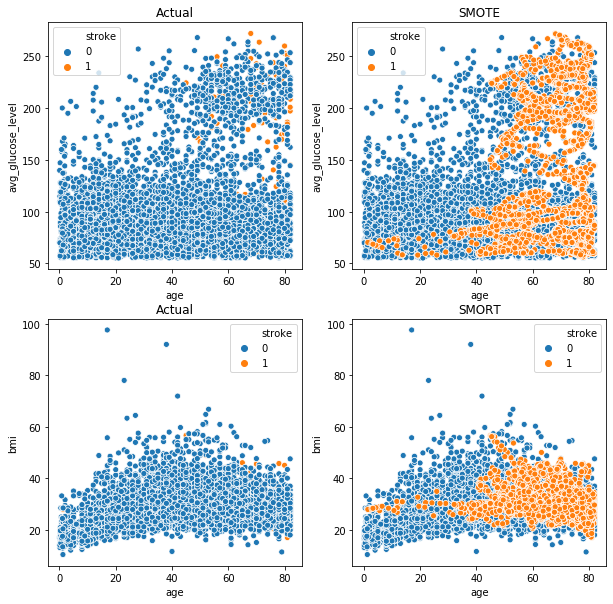

In [71]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

sns.scatterplot(data= df_1hot, x= 'age', y='avg_glucose_level', hue= 'stroke',ax= ax[0,0]).set_title('Actual')
sns.scatterplot(data= stroke_smote, x= 'age', y='avg_glucose_level', hue= 'stroke',ax= ax[0,1]).set_title('SMOTE')

sns.scatterplot(data= df_1hot, x= 'age', y='bmi', hue= 'stroke',ax= ax[1,0]).set_title('Actual')
sns.scatterplot(data= stroke_smote, x= 'age', y='bmi', hue= 'stroke',ax= ax[1,1]).set_title('SMORT')

plt.show()

Looking at the graphs above, SMOTE manages to generate synthetic data according to the distribution of the original samples. Based on the generated synthetic data, patients with stroke are people aged 40 and above and a smaller number of patients below 40 have strokes.

In [72]:
stroke_smote.loc[stroke_smote.stroke == 1].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_smokes,stroke
count,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.0,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.0
mean,68.184746,0.084962,0.051224,134.808923,29.832265,0.338613,0.0,0.794898,0.020366,0.392100,0.077556,0.002469,0.316190,0.049167,0.082493,0.046904,1.0
std,11.789906,0.278854,0.220477,62.462242,5.005942,0.473287,0.0,0.403818,0.141264,0.488269,0.267499,0.049629,0.465036,0.216238,0.275143,0.211455,0.0
min,1.320000,0.000000,0.000000,56.110000,16.900000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,59.270177,0.000000,0.000000,79.978851,27.188729,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,71.726302,0.000000,0.000000,107.384654,28.479988,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,78.036008,0.000000,0.000000,199.539124,31.856257,1.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
max,82.000000,1.000000,1.000000,271.740000,56.600000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [73]:
df_1hot.loc[df_1hot.stroke == 1].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_smokes,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.0,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.0
mean,67.728193,0.265060,0.188755,132.544739,30.087952,0.566265,0.0,0.883534,0.132530,0.598394,0.261044,0.008032,0.542169,0.188755,0.281124,0.168675,1.0
std,12.727419,0.442254,0.392102,61.921056,5.863936,0.496588,0.0,0.321429,0.339749,0.491210,0.440089,0.089441,0.499222,0.392102,0.450454,0.375219,0.0
min,1.320000,0.000000,0.000000,56.110000,16.900000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,59.000000,0.000000,0.000000,79.790000,27.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,71.000000,0.000000,0.000000,105.220000,28.400000,1.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
75%,78.000000,1.000000,0.000000,196.710000,32.500000,1.000000,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0
max,82.000000,1.000000,1.000000,271.740000,56.600000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


Comparing the summary tables above, the data distribution among the patients with stroke is similar to the original dataset.

## Logistic Regression
